# Cargando librerias & dataframe

In [83]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [84]:
path = '../data/datos_tratados.csv'
df = pd.read_csv(path)

# Preparar los datos para el modelado

In [85]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
6624,9412-GHEEC,1.0,1,0,0,0,40,1,1,Fiber optic,...,1,1,1,1,Month-to-month,0,Bank transfer (automatic),104.80,4131.95,3.493333
2026,2924-KHUVI,0.0,1,0,1,0,56,1,1,Fiber optic,...,0,0,1,1,One year,1,Electronic check,100.55,5514.95,3.351667
6518,9250-WYPLL,1.0,0,0,0,0,5,1,1,Fiber optic,...,0,0,0,0,Month-to-month,0,Electronic check,75.55,413.65,2.518333
1329,1977-STDKI,1.0,0,1,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,73.00,73.00,2.433333
5056,7109-CQYUZ,0.0,1,0,0,0,52,1,1,DSL,...,1,1,1,1,Two year,1,Mailed check,89.25,4652.40,2.975000


## Tratamiento

### Eliminando columna(s) irrelevantes y conversion de tipo

In [86]:
# Elimina la columna 'customerID' del DataFrame, ya que es solo un identificador y no aporta al modelado
df.drop(columns=['customerID'], inplace=True)

In [87]:
# Convierte la columna 'Churn' de float (0.0/1.0) a entero (0/1) para el modelado
df['Churn'] = df['Churn'].astype(int)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## Codificacion

### Transformando variables categoricas

Visualizacion de variables categoricas

In [89]:
# Visualiza las columnas en las posiciones 8, 15 y 17 del DataFrame (por índice)
df.iloc[:,[8,15,17]]

,InternetService,Contract,PaymentMethod
0,DSL,One year,Mailed check
1,DSL,Month-to-month,Mailed check
2,Fiber optic,Month-to-month,Electronic check
3,Fiber optic,Month-to-month,Electronic check
4,Fiber optic,Month-to-month,Mailed check
...,...,...,...
7038,DSL,One year,Mailed check
7039,Fiber optic,Month-to-month,Electronic check
7040,DSL,Month-to-month,Mailed check
7041,DSL,Two year,Mailed check


Cantidad de valores por columna (Informativo)

In [90]:
cols = df.columns[[8,15,17]]
for col in cols:
    print(f'{col}: {df[col].nunique()}')

InternetService: 3
Contract: 3
PaymentMethod: 4


#### OneHotEncoding

In [91]:
# Define una lista con los nombres de las columnas categóricas que se van a codificar
categoricas = ['InternetService', 'Contract', 'PaymentMethod']

pd.get_dummies(data=df, columns=categoricas, dtype=int).head

<bound method NDFrame.head of       Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0         0       0              0        1           1       9             1   
1         0       1              0        0           0       9             1   
2         1       1              0        0           0       4             1   
3         1       1              1        1           0      13             1   
4         1       0              1        1           0       3             1   
...     ...     ...            ...      ...         ...     ...           ...   
7038      0       0              0        0           0      13             1   
7039      1       1              0        1           0      22             1   
7040      0       1              0        0           0       2             1   
7041      0       1              0        1           1      67             1   
7042      0       1              0        1           1      63             0  

In [92]:
# Aplica One-Hot Encoding a las columnas categóricas seleccionadas y crea un nuevo DataFrame codificado
datos_codificados = pd.get_dummies(data=df, columns=categoricas, dtype=int)

In [93]:
datos_codificados.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1349,0,0,0,1,1,8,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3224,1,1,0,0,0,8,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2463,1,0,0,1,1,22,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
2774,0,1,0,0,0,66,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
6630,1,0,0,0,0,15,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0


## Balanceo de clases
Ajusta la proporción de clases en el dataset (por ejemplo, usando sobremuestreo (Oversampling) o submuestreo (Undersampling)) para que no haya desbalance entre clases.<br>
Esto es debido a que halla clases muy desbalanceadas (frecuencias muy diferentes)<br>
ver Carpeta `.../helpers/notas_adicionales`

### Verificacion proporcion de Cancelacion (Churn)

In [94]:
# Calcula el conteo y la proporción de cada clase en la columna 'Churn'
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


**RESULTADOS**<br>
La proporción que aparece indica que el 73.5% de los clientes permanecieron activos (0) y el `26.5% cancelaron (1).`
Esto muestra que `hay un desbalance de clases`: la mayoría de los clientes no cancelan, mientras que una menor proporción sí lo hace.

¿Qué significa esto?

Tus modelos predictivos pueden verse afectados, ya que podrían tender a predecir la clase mayoritaria (no cancelan).
Es recomendable considerar técnicas para tratar el desbalance, como:
Ajustar pesos en los modelos.
Usar sobremuestreo (SMOTE) o submuestreo.
Elegir métricas de evaluación adecuadas (f1-score, recall, etc.).

In [124]:
# Elimina la columna 'Churn' del nuevo DataFrame (X) para obtener las variables predictoras o explicativas
X = datos_codificados2.drop('Churn', axis=1)

# Selecciona la columna 'Churn' como variable objetivo
y = datos_codificados2.Churn

Listo el **dataFrame X** y la **serie y** para aplicar tecnicas de balanceo (oversampling en este caso)<br>
ver Carpeta `.../helpers/notas_adicionales`

In [96]:
# Se importa la clase SMOTE desde la librería imblearn.over_sampling.
from imblearn.over_sampling import SMOTE

In [97]:
# Crea una instancia de SMOTE para aplicar oversampling a la clase minoritaria
oversampling = SMOTE()

# Aplica SMOTE para balancear las clases en X (variables predictoras) e y (variable objetivo)
# x_balanceada y y_balanceada contienen los datos balanceados listos para el modelado
x_balanceada, y_balanceada = oversampling.fit_resample(X,y)

proporción de cada clase (abandono / no abandono) en el vector `y_balanceada` después de aplicar SMOTE.

In [98]:
# Como se usó oversampling, el resultado será que ambas clases churn = 0 (no abandono) y churn = 1(abandono) tienen la misma proporción (aproximadamente 0.5 cada una).
# Esto confirma que los datos ahora están balanceados y listos para entrenar un modelo sin sesgo hacia la clase mayoritaria.
y_balanceada.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

# Normalizacion
Escala los valores numéricos para que estén en un mismo rango (por ejemplo, entre 0 y 1).

- Las columnas `Charges.Monthly`, `Charges.Total` y `Cuentas_diarias` **no son variables explicativas** (es decir, no se usan como predictores en el modelo), no es necesario normalizarlas.

- Para estar seguros sin embargo, veremos a continuacion su correlacion con la variable objetivo (Churn)

# Análisis de correlación y selección de variables

In [99]:
# Calcula la correlación entre cada variable y la variable objetivo (Churn). Si la correlación es alta (positiva o negativa), puede ser relevante.
datos_codificados[['Charges.Monthly', 'Charges.Total', 'Cuentas_diarias', 'Churn']].corr()

,Charges.Monthly,Charges.Total,Cuentas_diarias,Churn
Charges.Monthly,1.000000,0.651174,1.000000,0.193356
Charges.Total,0.651174,1.000000,0.651174,-0.198324
Cuentas_diarias,1.000000,0.651174,1.000000,0.193356
Churn,0.193356,-0.198324,0.193356,1.000000


In [100]:
# Almacenamos la matriz de correlacion en la variable
corr_vars_churn = datos_codificados[['Charges.Monthly', 'Charges.Total', 'Cuentas_diarias', 'Churn']].corr()

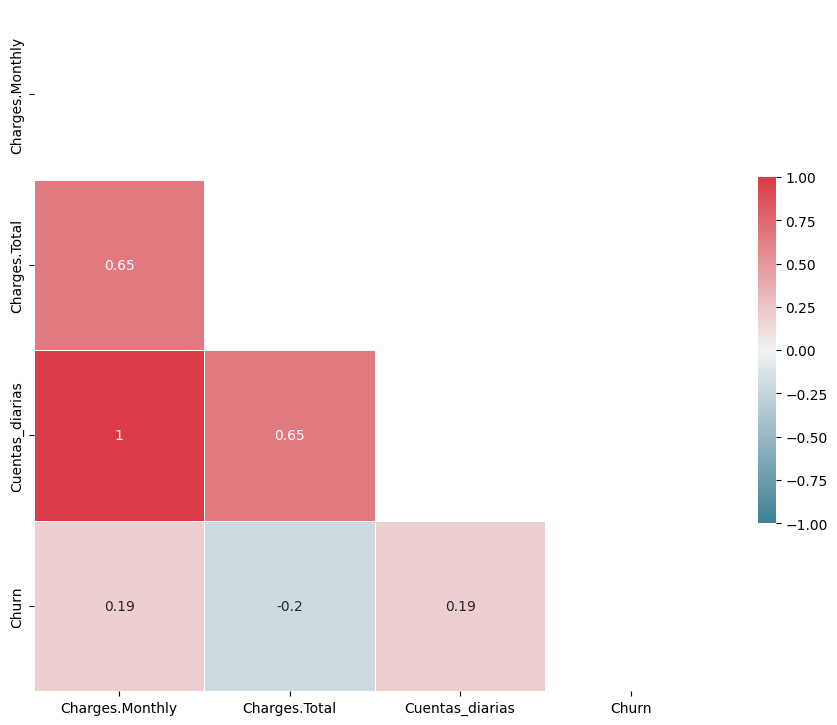

In [101]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr_vars_churn, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_vars_churn, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Del mapa de calor podemos apreciar la **perfecta correlación** que tienen Cuentas_diarias con Charges.Monthly ya que `Cuentas_diarias = Charges.Monthly/30`, por lo que contienen la misma informacion.<br>
Por ello: 
- `Cuentas_diarias` **no se tendrá en cuenta** 
- Se eliminará del dataframe ya que no aporta valor adicional al modelo, esto ayuda a evitar problemas de **multicolinealidad**

In [102]:
datos_codificados2 = datos_codificados.drop(columns=['Cuentas_diarias'])

In [103]:
# Almacenamos otra matriz de correlacion en la variable
corr_2vars_churn = datos_codificados[['Charges.Monthly', 'Charges.Total', 'Churn']].corr()

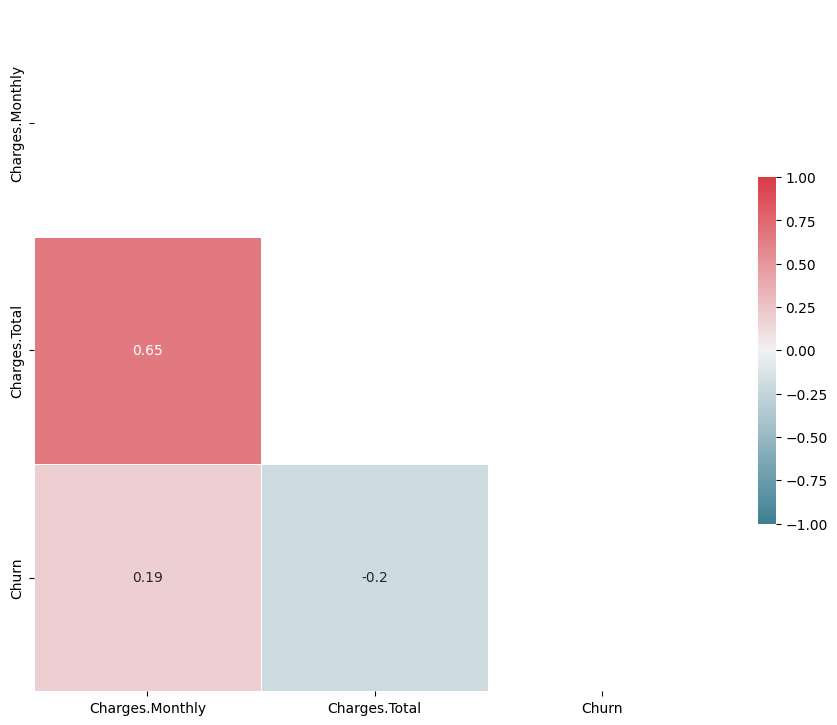

In [104]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr_2vars_churn, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_2vars_churn, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Lectura del mapa de calor**
- Ninguna de las dos variables tiene una correlación fuerte con Churn, pero ambas aportan algo de información.
- Se Puede usar una o ambas en el modelo, pero su poder predictivo individual será limitado.
- **No hay colinealidad extrema**, pero sí relación moderada entre ambas.

In [105]:
# Elimina la columna 'PhoneService' para reducir la multicolinealidad, 
# verificar resultados de celda 50 VIF
X = X.drop(columns=['PhoneService'])

# Separando datos para entrenamiento y para prueba
El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [106]:
# import train_test_split
from sklearn.model_selection import train_test_split

ver Carpeta `.../helpers/notas_adicionales`

In [107]:
# Divide los datos en conjuntos de entrenamiento (70%) y prueba (30%) de forma reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) # Garantizar la reproductividad de la segregacion de los datos

## MultiColinealidad<br>
Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [108]:
#se está creando una lista llamada explicativas que contiene los nombres de todas las columnas del DataFrame datos_codificados2, 
# excepto la columna Churn.
#Esto te da la lista de variables explicativas (predictoras) que puedes usar en tu modelo, 
# excluyendo la variable objetivo (Churn).
explicativas = list(X.columns) #list(datos_codificados2.drop(columns='Churn', axis=1).columns)
explicativas

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

### Verificacion VIF
Según la teoría, si el <span style="color:orange">**VIF (Variance Inflation Factor) de una variable es mayor a 5**</span> se considera que existe multicolinealidad moderada o alta entre esa variable y las demás variables explicativas del modelo.`

**`VIF > 5`**: Hay multicolinealidad significativa <br>
(algunos autores usan el umbral de 10, pero 5 es un criterio común y más conservador).<br>
**`VIF ≈ 1:`** No hay multicolinealidad.

In [109]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [110]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas

vif_1['vif'] = [vif(X_train[explicativas],i) for i in range(len (explicativas))]
vif_1

,variables,vif
0,gender,1.004725
1,SeniorCitizen,1.171016
2,Partner,1.472815
3,Dependents,1.390306
4,tenure,7.590909
5,MultipleLines,1.920525
6,OnlineSecurity,1.677563
7,OnlineBackup,1.644790
8,DeviceProtection,1.692910
9,TechSupport,1.744813


Valores aceptables, Solo la variable `tenure` tiene un VIF algo elevado (7.59), lo que indica cierta colinealidad moderada, pero no es extremo.

# Analisis dirigido

Relación de variables como el tiempo de contrato y el gasto total con la cancelación, utilizando gráficos como boxplots o scatter plots para identificar patrones y tendencias

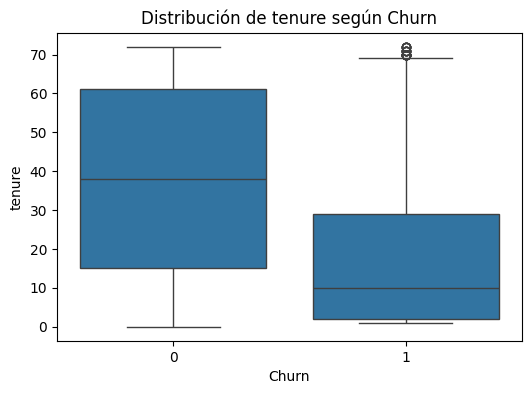

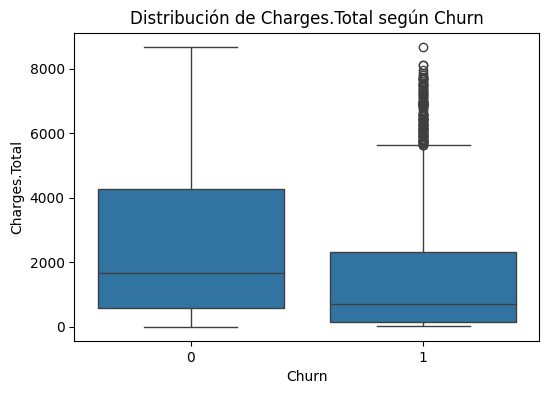

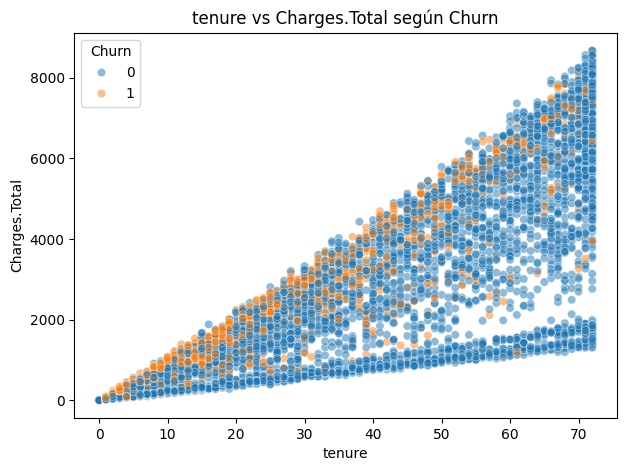

In [111]:
# Boxplot: tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribución de tenure según Churn')
plt.show()

# Boxplot: Charges.Total vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribución de Charges.Total según Churn')
plt.show()

# Scatter plot: tenure vs Charges.Total, coloreado por Churn
plt.figure(figsize=(7,5))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, alpha=0.5)
plt.title('tenure vs Charges.Total según Churn')
plt.show()

**Graficas:**<br>
**Boxplot tenure vs Churn**
- Los clientes que no cancelan (Churn=0) tienen un tenure (tiempo de permanencia) mucho mayor en promedio.
- Los que cancelan (Churn=1) suelen tener un tenure bajo; es decir, la mayoría de los que se van son clientes recientes.

**Boxplot Charges.Total vs Churn**
- Los clientes que no cancelan acumulan un gasto total mucho mayor.
- Los que cancelan tienen un gasto total bajo, lo que es coherente con su menor tiempo como clientes.

**Scatter plot tenure vs Charges.Total según Churn**
- Existe una relación lineal clara entre tenure y gasto total (más tiempo, más gasto).
- Los puntos naranjas (Churn=1) se concentran en la parte baja de tenure y gasto total, mostrando que la mayoría de los que cancelan son clientes nuevos o con poco gasto acumulado.

**Conclusión:**<br>
Los clientes que permanecen más tiempo y gastan más son menos propensos a cancelar. La cancelación es más frecuente en clientes recientes y de bajo gasto.

Estas variables `Charges.Total` ^ `ternure` son **buenos predictores** para el modelo de churn.

# Entrenamiento de modelos

Se entrena un árbol de decisión con los datos y muestra la precisión obtenida en el entrenamiento.

In [112]:
# Importa el clasificador de árbol de decisión de scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Crea una instancia del clasificador de árbol de decisión
modelo_tree = DecisionTreeClassifier()

# Entrena el modelo usando las variables predictoras o explicativas X y la variable objetivo y
modelo_tree.fit(X,y)

# Calcula y devuelve la exactitud del modelo sobre los mismos datos de entrenamiento
modelo_tree.score(X,y)

0.9974442709072838

Separando datos para entrenamiento y prueba
ya se genero las variables en la celda 45<br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) # Garantizar la reproductividad de la segregacion de los datos

In [113]:
# Divide los datos en conjuntos de entrenamiento (70%) y prueba (30%) de forma reproducible
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) # Garantizar la reproductividad de la segregacion de los datos

Divide X e y en conjuntos de entrenamiento y validación

In [114]:
# Por defecto, test_size=0.25, así que X_val y y_val tendrán el 25% de los datos y X_train/y_train el 75%.
# stratify=y mantiene la proporción de clases y random_state=5 asegura reproducibilidad.
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

Se crea y entrena un `árbol de decisión` con los datos de **entrenamiento** y luego muestra la precisión (exactitud) del modelo tanto en el conjunto de **entrenamiento** como en el de **validación**. Esto permite comparar el desempeño del modelo en ambos conjuntos y detectar posibles problemas de sobreajuste.

In [115]:
# Crea una instancia del clasificador de árbol de decisión
modelo1 = DecisionTreeClassifier()
# Entrena el modelo con los datos de entrenamiento (X_train, y_train)
modelo1.fit(X_train, y_train)
# Imprime la exactitud del modelo usando los datos de entrenamiento
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo1.score(X_train,y_train)}')
# Imprime la exactitud del modelo usando los datos de validación
print(f'La exactitud del modelo con el conjunto de validacion es: {modelo1.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.9977281332828474
La exactitud del modelo con el conjunto de validacion es: 0.7291311754684838


Ajustando la profundidad `max_depth=10`<br>
osea, controla la complejidad del árbol y mejora la capacidad de generalización del modelo.

In [116]:
# Crea una instancia del clasificador de árbol de decisión con una profundidad máxima de 10
modelo1 = DecisionTreeClassifier(max_depth=10)

# Entrena el modelo con los datos de entrenamiento
modelo1.fit(X_train, y_train)

# Imprime la exactitud del modelo usando los datos de entrenamiento
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo1.score(X_train,y_train)}')

# Imprime la exactitud del modelo usando los datos de validación
print(f'La exactitud del modelo con el conjunto de validacion es: {modelo1.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.8782658084059068
La exactitud del modelo con el conjunto de validacion es: 0.7643384440658717


# Evaluación del rendimiento de los modelos con métricas.

## Modelo árbol de decisión

Se generan las predicciones del modelo de árbol de decisión usando los datos de validación, calcula la matriz de confusión comparando las etiquetas reales y las predichas, y **muestra esa matriz en pantalla** para evaluar el desempeño del modelo.

In [117]:
# Genera las predicciones del modelo usando los datos de validación
y_previsto = modelo1.predict(X_val)

# Calcula la matriz de confusión comparando las etiquetas reales y las predichas
matriz_confusion = confusion_matrix(y_val, y_previsto)

# Muestra la matriz de confusión en pantalla
print(matriz_confusion)

[[1083  211]
 [ 204  263]]


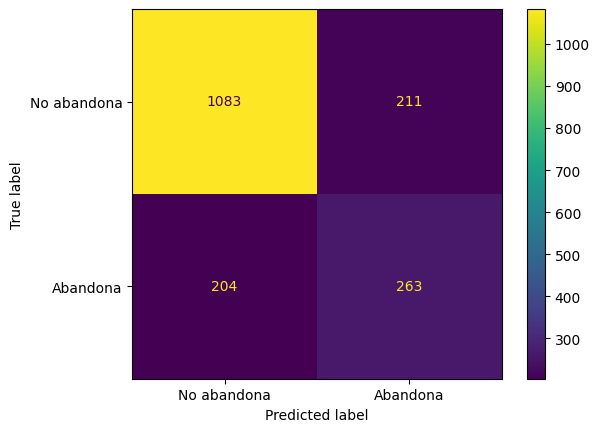

In [118]:
# Crea un objeto para visualizar la matriz de confusión con etiquetas personalizadas
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No abandona', 'Abandona'])

# Muestra gráficamente la matriz de confusión
visualizacion.plot();

**Interpretacion:**<br>
- **1080**: Clientes que no abandonaron y el modelo predijo correctamente que no abandonarían (verdaderos negativos).
- **265**: Clientes que abandonaron y el modelo predijo correctamente que abandonarían (verdaderos positivos).
- **214**: Clientes que no abandonaron, pero el modelo predijo que sí abandonarían (falsos positivos).
- **202**: Clientes que abandonaron, pero el modelo predijo que no abandonarían (falsos negativos).

# Evaluación de los modelos

In [119]:
# Importa las funciones para calcular exactitud, precisión, recall y f1-score desde sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [120]:
print(f'La precision del modelo es: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad, recuperación (Recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')

La precision del modelo es: 0.5548523206751055
La sensibilidad, recuperación (Recall) del modelo es: 0.563169164882227
La exactitud (accuracy) del modelo es: 0.7643384440658717


In [121]:
# Imprime el valor del F1-score del modelo usando los datos de validación
# El F1-score es una métrica que combina precisión y recall; mientras más cerca de 1, mejor el modelo.
print(f'El F1-score del modelo es: {f1_score(y_val, y_previsto)}')

El F1-score del modelo es: 0.5589798087141339


**Informe de las metricas de clasificacion**

In [122]:
# Sirve para generar un informe con las principales métricas de clasificación
from sklearn.metrics import classification_report

In [123]:
# Imprime un informe con las métricas de clasificación
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1294
           1       0.55      0.56      0.56       467

    accuracy                           0.76      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.77      0.76      0.76      1761



# Informe final